# Import thư viện

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import skew
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold

# Import và giới thiệu bộ dữ liệu

In [196]:
locations = pd.read_csv('./Dataset gốc/location_coordinates.csv')['Location'].values

In [197]:
df = pd.read_csv('./Dataset gốc/HCMCity_weather.csv')
df

location   latitude   longitude        date  \
0           District 1  10.777314  106.699991  25/10/2014   
1           District 1  10.777314  106.699991  26/10/2014   
2           District 1  10.777314  106.699991  27/10/2014   
3           District 1  10.777314  106.699991  28/10/2014   
4           District 1  10.777314  106.699991  29/10/2014   
...                ...        ...         ...         ...   
80383  Nha Be District  10.650967  106.726382  21/10/2024   
80384  Nha Be District  10.650967  106.726382  22/10/2024   
80385  Nha Be District  10.650967  106.726382  23/10/2024   
80386  Nha Be District  10.650967  106.726382  24/10/2024   
80387  Nha Be District  10.650967  106.726382  25/10/2024   

       relative_humidity_2m  dew_point_2m  pressure_msl  surface_pressure  \
0                 85.373660     23.819918    1012.01666        1010.51860   
1                 87.564476     24.022001    1010.92920        1009.43160   
2                 86.153360     23.707418    1010.14166        1008.64510   
3                 86.377020     23.897001    1010.45416        1008.95770   
4                 88.206550     24.094917    1009.81665        1008.32030   
...                     ...           ...           ...               ...   
80383             87.598656     23.791666    1009.25000        1008.78930   
80384             87.889320     24.168749    1009.20416        1008.74390   
80385             82.358444     23.818750    1008.82916        1008.37054   
80386             93.146370     22.925000    1008.68750        1008.22394   
80387                   NaN           NaN           NaN               NaN   

       cloud_cover  weather_code  ...  sunshine_duration  precipitation_sum  \
0             73.5          53.0  ...          37928.562           1.900000   
1             60.0          63.0  ...          33967.387          11.200000   
2             49.5          51.0  ...          39326.402           1.100000   
3            100.0          63.0  ...          39313.547           5.300000   
4            100.0          63.0  ...          26276.414          13.400001   
...            ...           ...  ...                ...                ...   
80383        100.0          63.0  ...          20873.795          12.500000   
80384        100.0          63.0  ...          17342.809           8.300000   
80385        100.0          51.0  ...          34572.477           0.500000   
80386         90.0          51.0  ...                NaN                NaN   
80387          NaN           NaN  ...                NaN                NaN   

        rain_sum  snowfall_sum  precipitation_hours  wind_speed_10m_max  \
0       1.900000           0.0                    7            6.638072   
1      11.200000           0.0                   13            9.199390   
2       1.100000           0.0                    5            7.412853   
3       5.300000           0.0                    9            8.557102   
4      13.400001           0.0                   15            6.409617   
...          ...           ...                  ...                 ...   
80383  12.500000           0.0                   12           13.577776   
80384   8.300000           0.0                   15           11.103243   
80385   0.500000           0.0                    5           14.083778   
80386        NaN           NaN                    3           11.841756   
80387        NaN           NaN                    0                 NaN   

       wind_gusts_10m_max  wind_direction_10m_dominant  \
0               20.160000                    93.062210   
1               22.319998                    27.916817   
2               19.080000                   327.362550   
3               21.240000                   350.073760   
4               22.680000                   112.777050   
...                   ...                          ...   
80383           30.239998                   325.407600   
80384           24.119999                 

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80388 entries, 0 to 80387
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   location                     80388 non-null  object 
 1   latitude                     80388 non-null  float64
 2   longitude                    80388 non-null  float64
 3   date                         80388 non-null  object 
 4   relative_humidity_2m         80366 non-null  float64
 5   dew_point_2m                 80366 non-null  float64
 6   pressure_msl                 80366 non-null  float64
 7   surface_pressure             80366 non-null  float64
 8   cloud_cover                  80366 non-null  float64
 9   weather_code                 80366 non-null  float64
 10  temperature_2m_max           80366 non-null  float64
 11  temperature_2m_min           80366 non-null  float64
 12  temperature_2m_mean          80344 non-null  float64
 13  apparent_tempera

In [199]:
df.describe(include='all').T

count unique         top  freq          mean  \
location                       80388     22  District 1  3654           NaN   
latitude                     80388.0    NaN         NaN   NaN     10.779544   
longitude                    80388.0    NaN         NaN   NaN     106.66581   
date                           80388   3654  25/10/2024    22           NaN   
relative_humidity_2m         80366.0    NaN         NaN   NaN     78.796161   
dew_point_2m                 80366.0    NaN         NaN   NaN     22.991302   
pressure_msl                 80366.0    NaN         NaN   NaN    1009.66807   
surface_pressure             80366.0    NaN         NaN   NaN   1008.531496   
cloud_cover                  80366.0    NaN         NaN   NaN     82.037214   
weather_code                 80366.0    NaN         NaN   NaN     45.587749   
temperature_2m_max           80366.0    NaN         NaN   NaN      31.76357   
temperature_2m_min           80366.0    NaN         NaN   NaN     24.320197   
temperature_2m_mean          80344.0    NaN         NaN   NaN     27.382753   
apparent_temperature_max     80366.0    NaN         NaN   NaN     37.007672   
apparent_temperature_min     80366.0    NaN         NaN   NaN     28.734709   
apparent_temperature_mean    80344.0    NaN         NaN   NaN     31.898724   
sunrise                      80388.0    NaN         NaN   NaN           0.0   
sunset                       80388.0    NaN         NaN   NaN           0.0   
daylight_duration            80388.0    NaN         NaN   NaN  43661.239702   
sunshine_duration            80344.0    NaN         NaN   NaN  34052.021427   
precipitation_sum            80344.0    NaN         NaN   NaN       5.84384   
rain_sum                     80344.0    NaN         NaN   NaN       5.84384   
snowfall_sum                 80344.0    NaN         NaN   NaN           0.0   
precipitation_hours          80388.0    NaN         NaN   NaN      6.512925   
wind_speed_10m_max           80366.0    NaN         NaN   NaN     15.380083   
wind_gusts_10m_max           80366.0    NaN         NaN   NaN     32.331647   
wind_direction_10m_dominant  80344.0    NaN         NaN   NaN    168.950975   
shortwave_radiation_sum      80344.0    NaN         NaN   NaN     18.526819   
et0_fao_evapotranspiration   80344.0    NaN         NaN   NaN      4.163002   

                                     std        min          25%         50%  \
location                             NaN        NaN          NaN         NaN   
latitude                        0.090161  10.526532    10.750004   10.775023   
longitude                       0.078445  106.50241   106.629615  106.668455   
date                                 NaN        NaN          NaN         NaN   
relative_humidity_2m            9.611546  44.269974     71.38009   82.179205   
dew_point_2m                    2.084719  11.898833    21.913419   23.886418   
pressure_msl                    2.006496  1002.1875   1008.26666   1009.5708   
surface_pressure                2.071777   999.5782   1007.10336  1008.43634   
cloud_cover                    22.317393        0.0         65.7        93.9   
weather_code                   24.353453        0.0         51.0        55.0   
temperature_2m_max              2.050024  23.567501      30.4675     31.4895   
temperature_2m_min              1.372117  17.567501    23.672501   24.424002   
temperature_2m_mean             1.300217   22.13833    26.525833   27.228746   
apparent_temperature_max        2.328512   23.83906    35.564373   37.152311   
apparent_temperature_min        2.391824   17.36715    27.747142   29.113285   
apparent_temperature_mean       1.872558  21.619316    30.889981   31.984811   
sunrise                              0.0        0.0          0.0         0.0   
sunset                               0.0        0.0          0.0         0.0   
daylight_duration            1571.522267   41309.73     42128.38   43673.744   
sunshine_duration            9005.261745        0.0  30882.5

# Giai đoạn 1 - Tiền xử lý dữ liệu

## Tạo cột biến phụ thuộc để làm mục tiêu cho dự báo

Cột `RainTomorrow` là cột mục tiêu của bài toán, nó dự báo lượng mưa ngày tiếp theo, được tạo nên bằng cách kiểm tra cột cột `precipitation_sum > 1mm` sau đó dời lại 1 ngày theo từng địa điểm.

In [200]:
for location in locations:
    shifted_precipitation = df[df['location'] == location]['precipitation_sum'].shift(-1)
    rain_tomorrow = shifted_precipitation.apply(lambda x: 1 if x > 1 else (0 if pd.notna(x) else None))
    
    df.loc[df['location'] == location, 'RainTomorrow'] = rain_tomorrow


## Xoá thuộc tính trùng lặp


Toàn bộ cột `rain_sum` có giá trị trùng lặp với cột `precipitation_sum` --> Loại bỏ

In [201]:
df.drop(columns=['rain_sum'], inplace=True)

## Xoá thuộc tính không có giá trị sử dụng

- Từ kết quả trên ta thấy cột `sunrise` và `sunset` không chứ dữ liệu mà toàn bộ là giá trị 0. --> Loại bỏ
- Vì thời tiết TP. Hồ Chí Minh không có tuyết nên cột `snowfall_sum` không chứa dữ liệu. --> Loại bỏ

In [202]:
df.drop(columns=['sunrise', 'sunset', 'snowfall_sum'], inplace=True)

## Xử lí dữ liệu bị khuyết

In [203]:
# Kiểm tra tổng số null trong tất cả các feature
total_null = df.isnull().sum()
percent = df.isnull().sum() / df.shape[0] * 100.00
pd.concat([total_null, percent, df.dtypes], axis=1, keys=['Total', 'Percentage (%)', 'Type']).sort_values(by='Percentage (%)', ascending=False)

Total  Percentage (%)     Type
RainTomorrow                    66        0.082102  float64
temperature_2m_mean             44        0.054735  float64
et0_fao_evapotranspiration      44        0.054735  float64
precipitation_sum               44        0.054735  float64
wind_direction_10m_dominant     44        0.054735  float64
shortwave_radiation_sum         44        0.054735  float64
apparent_temperature_mean       44        0.054735  float64
sunshine_duration               44        0.054735  float64
relative_humidity_2m            22        0.027367  float64
dew_point_2m                    22        0.027367  float64
temperature_2m_max              22        0.027367  float64
apparent_temperature_min        22        0.027367  float64
temperature_2m_min              22        0.027367  float64
apparent_temperature_max        22        0.027367  float64
pressure_msl                    22        0.027367  float64
surface_pressure                22        0.027367  float64
weather_code                    22        0.027367  float64
cloud_cover                     22        0.027367  float64
wind_gusts_10m_max              22        0.027367  float64
wind_speed_10m_max              22        0.027367  float64
location                         0        0.000000   object
latitude                         0        0.000000  float64
date                             0        0.000000   object
longitude                        0        0.000000  float64
daylight_duration                0        0.000000  float64
precipitation_hours              0        0.000000    int64

Vì dữ liệu khuyết không nhiều nên hiển thị để kiểm tra và xử lí.

In [204]:
null_data = df[df.isnull().any(axis=1)]
null_data

location   latitude   longitude        date  \
3651         District 1  10.777314  106.699991  23/10/2024   
3652         District 1  10.777314  106.699991  24/10/2024   
3653         District 1  10.777314  106.699991  25/10/2024   
7305         District 3  10.778639  106.687016  23/10/2024   
7306         District 3  10.778639  106.687016  24/10/2024   
...                 ...        ...         ...         ...   
76732  Hoc Mon District  10.878345  106.576353  24/10/2024   
76733  Hoc Mon District  10.878345  106.576353  25/10/2024   
80385   Nha Be District  10.650967  106.726382  23/10/2024   
80386   Nha Be District  10.650967  106.726382  24/10/2024   
80387   Nha Be District  10.650967  106.726382  25/10/2024   

       relative_humidity_2m  dew_point_2m  pressure_msl  surface_pressure  \
3651              81.919810     23.801168    1008.80420        1007.31494   
3652              92.736435     22.640750    1008.70000        1007.19324   
3653                    NaN           NaN           NaN               NaN   
7305              81.919810     23.801168    1008.80420        1007.31494   
7306              92.736435     22.640750    1008.70000        1007.19324   
...                     ...           ...           ...               ...   
76732             95.006650     22.467999    1008.75000        1008.05290   
76733                   NaN           NaN           NaN               NaN   
80385             82.358444     23.818750    1008.82916        1008.37054   
80386             93.146370     22.925000    1008.68750        1008.22394   
80387                   NaN           NaN           NaN               NaN   

       cloud_cover  weather_code  ...  daylight_duration  sunshine_duration  \
3651         100.0          51.0  ...          42510.977          35818.453   
3652          88.8          51.0  ...          42478.367                NaN   
3653           NaN           NaN  ...          42445.910                NaN   
7305         100.0          51.0  ...          42510.977          35818.453   
7306          88.8          51.0  ...          42478.367                NaN   
...            ...           ...  ...                ...                ...   
76732        100.0          61.0  ...          42470.867                NaN   
76733          NaN           NaN  ...          42438.188                NaN   
80385        100.0          51.0  ...          42525.523          34572.477   
80386         90.0          51.0  ...          42493.360                NaN   
80387          NaN           NaN  ...          42461.340                NaN   

       precipitation_sum  precipitation_hours  wind_speed_10m_max  \
3651                 0.2                    2           14.197196   
3652                 NaN                    3           10.948973   
3653                 NaN                    0                 NaN   
7305                 0.2                    2           14.197196   
7306                 NaN                    3           10.948973   
...                  ...                  ...                 ...   
76732                NaN                    4           10.534229   
76733                NaN                    0                 NaN   
80385                0.5                    5           14.083778   
80386                NaN                    3           11.841756   
80387                NaN                    0                 NaN   

       wind_gusts_10m_max  wind_direction_10m_dominant  \
3651            24.840000                    312.10860   
3652            20.880001                          NaN   
3653                  NaN                          NaN   
7305            24.840000                    312.10860   
7306            20.880001                          NaN   
...                   ...                          ...   
76732           18.359999                          NaN   
76733                 NaN                          NaN   
80385           28.440000                    

Bộ dữ liệu chỉ chứa 66 dòng bị thiếu và chỉ nằm ở 3 ngày cuối cùng tại mỗi địa điểm, trong đó 1 dòng do thiếu RainTomorrow và 2 dòng do 2 ngày cận kề với ngày cập nhập dữ liệu theo 22 địa điểm, có 2 cách giải quyết cho trường hợp này:
- **Loại bỏ dòng cuối cùng**: Dữ liệu sẽ không bị ảnh hưởng nhiều vì chỉ mất ít dòng dữ liệu.
- **Điền giá trị**: Điền giá trị trung bình, hoặc giá trị ngày trước đó.
</br>
Kết quả: `Loại bỏ 66 dòng thiếu`

In [205]:
df.dropna(inplace=True)

Vậy ngày cuối cùng của bộ dữ liệu sau khi xử lí sẽ là `22/10/2024`

## Chuyển đổi kiểu dữ liệu

Kiểu dữ liệu ngày

In [206]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

Kiểu dữ liệu số

In [207]:
df['RainTomorrow'] = df['RainTomorrow'].astype('int')
df['weather_code'] = df['weather_code'].astype('int')

## Hoàn tất tiền xử lí dữ liệu

In [208]:
df.to_csv('./Dataset - Giai đoạn 1/HCMCity_weather.csv', index=False)

# Giai đoạn 2 - EDA

## Thống kê mô tả

In [209]:
df.describe().T

count                           mean  \
latitude                     80322.0                      10.779544   
longitude                    80322.0                      106.66581   
date                           80322  2019-10-23 23:59:59.999999744   
relative_humidity_2m         80322.0                      78.791135   
dew_point_2m                 80322.0                      22.991187   
pressure_msl                 80322.0                    1009.668565   
surface_pressure             80322.0                    1008.531995   
cloud_cover                  80322.0                       82.02909   
weather_code                 80322.0                      45.584286   
temperature_2m_max           80322.0                      31.765562   
temperature_2m_min           80322.0                      24.320641   
temperature_2m_mean          80322.0                      27.382748   
apparent_temperature_max     80322.0                      37.009709   
apparent_temperature_min     80322.0                      28.735283   
apparent_temperature_mean    80322.0                      31.898598   
daylight_duration            80322.0                   43662.210781   
sunshine_duration            80322.0                   34051.583149   
precipitation_sum            80322.0                       5.845313   
precipitation_hours          80322.0                        6.51667   
wind_speed_10m_max           80322.0                      15.381672   
wind_gusts_10m_max           80322.0                      32.336638   
wind_direction_10m_dominant  80322.0                     168.912566   
shortwave_radiation_sum      80322.0                      18.526021   
et0_fao_evapotranspiration   80322.0                       4.162911   
RainTomorrow                 80322.0                       0.586552   

                                             min                  25%  \
latitude                               10.526532            10.750004   
longitude                              106.50241           106.629615   
date                         2014-10-25 00:00:00  2017-04-24 00:00:00   
relative_humidity_2m                   44.269974            71.376074   
dew_point_2m                           11.898833            21.911647   
pressure_msl                           1002.1875           1008.26666   
surface_pressure                        999.5782            1007.1031   
cloud_cover                                  0.0                 65.7   
weather_code                                 0.0                 51.0   
temperature_2m_max                     23.567501              30.4675   
temperature_2m_min                     17.567501            23.674002   
temperature_2m_mean                     22.13833            26.525358   
apparent_temperature_max                23.83906            35.565996   
apparent_temperature_min                17.36715            27.747839   
apparent_temperature_mean              21.619316            30.889763   
daylight_duration                       41309.73            42128.043   
sunshine_duration                            0.0            30881.559   
precipitation_sum                            0.0                  0.1   
precipitation_hours                          0.0                  1.0   
wind_speed_10m_max                       4.73506            12.096214   
wind_gusts_10m_max                     12.599999                26.64   
wind_direction_10m_dominant             0.000005           115.481877   
shortwave_radiation_sum                     1.52                16.39   
et0_fao_evapotranspiration              0.381282             3.472025   
RainTomorrow                                 0.0                  0.0   

                                             50%                  75%  \
latitude                               10.775023            10.802583   
longitude                             106.668455           106.707552   
date                         2019-10-24 00:00:00  2022-04-24 00:00

## Phân tích thăm dò

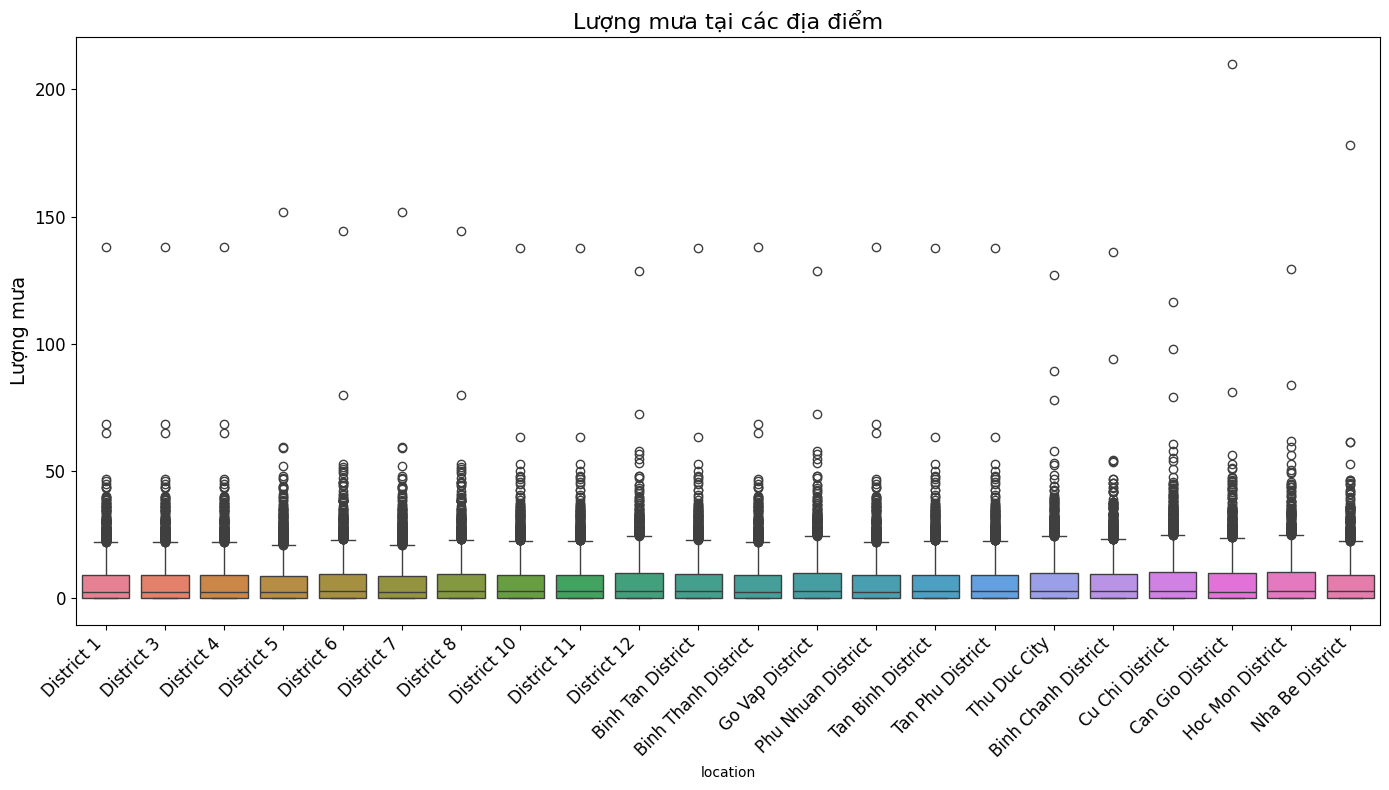

In [210]:
plt.figure(figsize=(14, 8)) 

palette = sns.color_palette("husl", len(df['location'].unique()))

sns.boxplot(data=df, x='location', y='precipitation_sum', palette=palette, hue='location')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Lượng mưa tại các địa điểm', fontsize=16)
plt.ylabel('Lượng mưa', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend([],[], frameon=False)

plt.tight_layout()

plt.show()

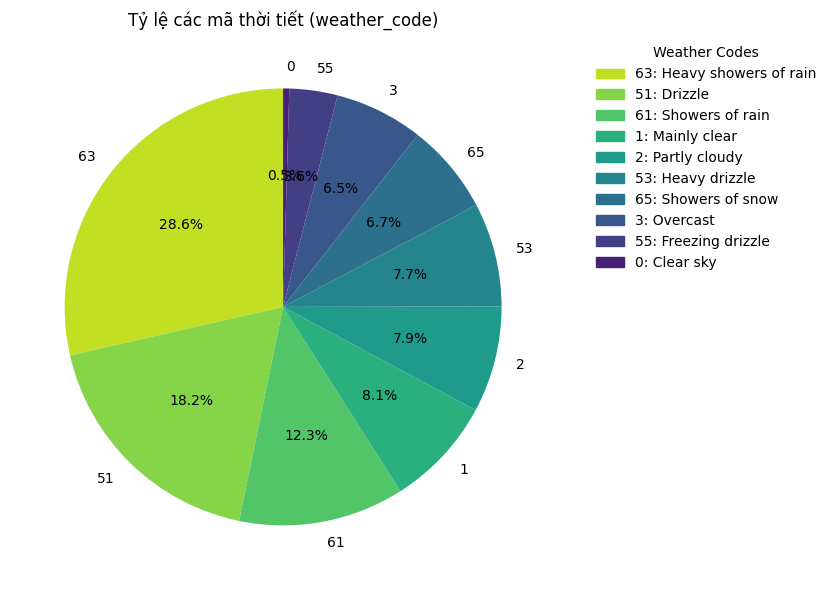

In [211]:
weather_code_map = {
    0: 'Clear sky',
    1: 'Mainly clear',
    2: 'Partly cloudy',
    3: 'Overcast',
    51: 'Drizzle',
    53: 'Heavy drizzle',
    55: 'Freezing drizzle',
    61: 'Showers of rain',
    63: 'Heavy showers of rain',
    65: 'Showers of snow',
}

# Chuẩn bị dữ liệu
weather_counts = df['weather_code'].value_counts()  # Đếm số lượng từng mã thời tiết
weather_labels = [f"{code}: {weather_code_map[code]}" for code in weather_counts.index]  # Tạo nhãn mô tả chi tiết

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 6))
colors = sns.color_palette('viridis', len(weather_counts))[::-1]  # Đảo ngược bảng màu
plt.pie(
    weather_counts,
    labels=weather_counts.index,  # Hiển thị mã thời tiết trong biểu đồ
    colors=colors,
    autopct='%1.1f%%',  # Hiển thị phần trăm
    startangle=90,  # Bắt đầu từ góc 90 độ
)

# Thêm chú thích (custom legend)
plt.legend(
    handles=[
        plt.Rectangle((0, 0), 1, 1, color=colors[i])
        for i in range(len(weather_counts))
    ],
    labels=weather_labels,
    title='Weather Codes',
    bbox_to_anchor=(1.05, 1),  # Đặt chú thích ở bên phải biểu đồ
    loc='upper left',
    frameon=False
)

# Cài đặt tiêu đề và hiển thị biểu đồ
plt.title('Tỷ lệ các mã thời tiết (weather_code)')
plt.tight_layout()

plt.show()


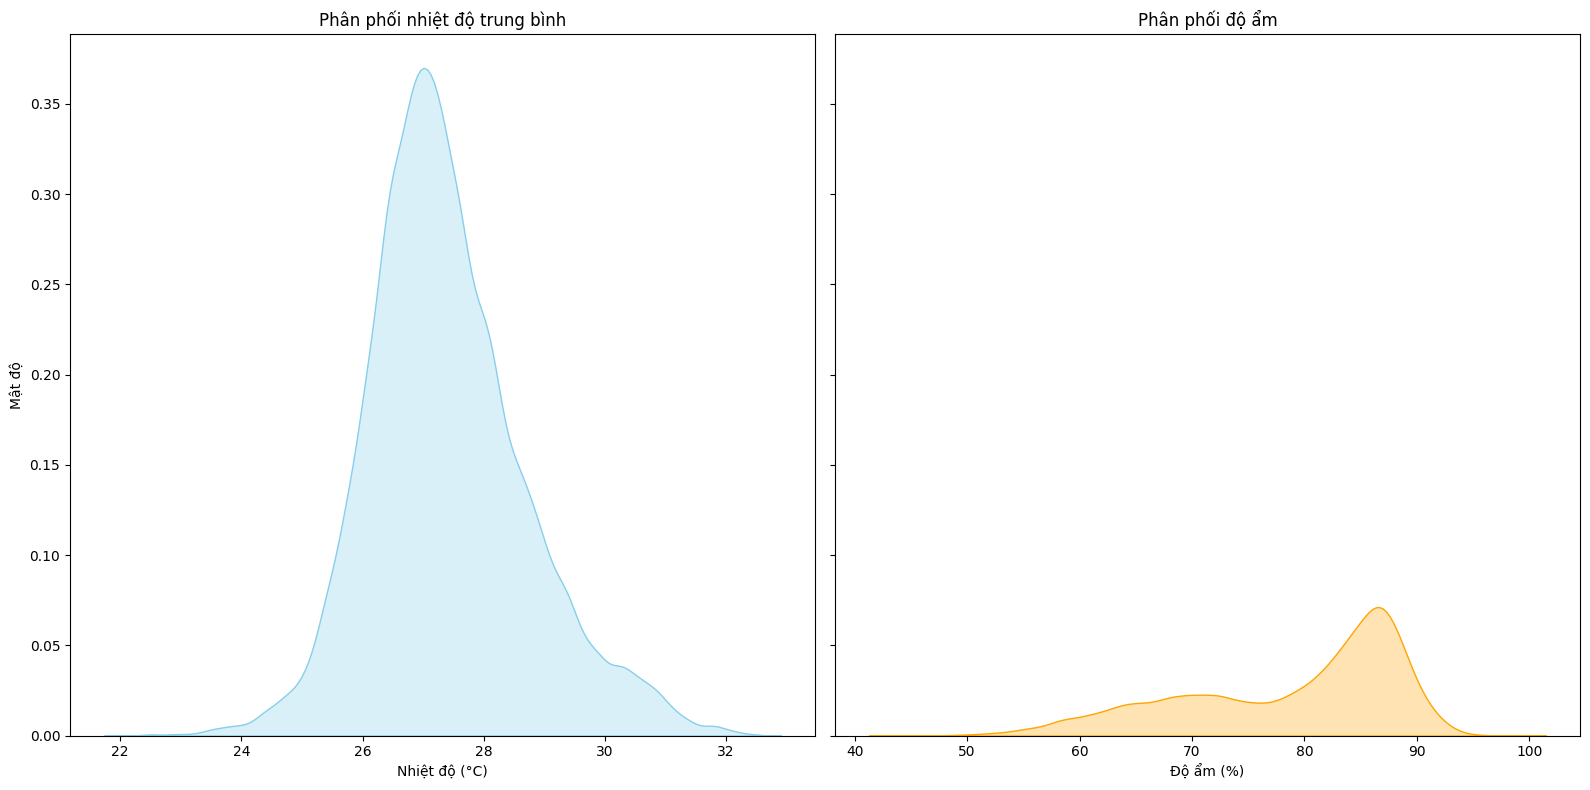

In [212]:
# Tạo figure với 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Biểu đồ đường cho nhiệt độ
sns.kdeplot(df['temperature_2m_mean'], color='skyblue', fill=True, ax=axes[0], alpha=0.3)
axes[0].set_title('Phân phối nhiệt độ trung bình')
axes[0].set_xlabel('Nhiệt độ (°C)')
axes[0].set_ylabel('Mật độ')

# Biểu đồ đường cho độ ẩm
sns.kdeplot(df['relative_humidity_2m'], color='orange', fill=True, ax=axes[1], alpha=0.3)
axes[1].set_title('Phân phối độ ẩm')
axes[1].set_xlabel('Độ ẩm (%)')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

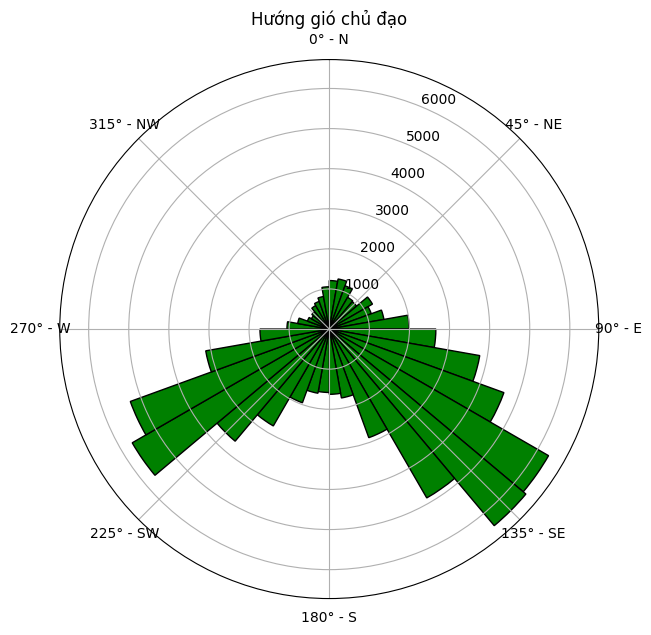

In [213]:
wind_directions = df['wind_direction_10m_dominant'].dropna()
angles = np.deg2rad(wind_directions)

# Vẽ biểu đồ Polar
plt.figure(figsize=(7, 7))
ax = plt.subplot(111, polar=True)

ax.hist(angles, bins=36, color='green', edgecolor='black')

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

directions = [
    '0° - N', '45° - NE', '90° - E', '135° - SE',
    '180° - S', '225° - SW', '270° - W', '315° - NW'
]
angles = np.linspace(0, 2 * np.pi, 8, endpoint=False)  # Chia đều góc
ax.set_xticks(angles)
ax.set_xticklabels(directions)

plt.title('Hướng gió chủ đạo')

plt.show()

Tạo thêm một cột RainToday để vẽ các biểu đồ

In [214]:
df['RainToday'] = df['precipitation_sum'].apply(lambda x: 1 if x > 1 else 0)

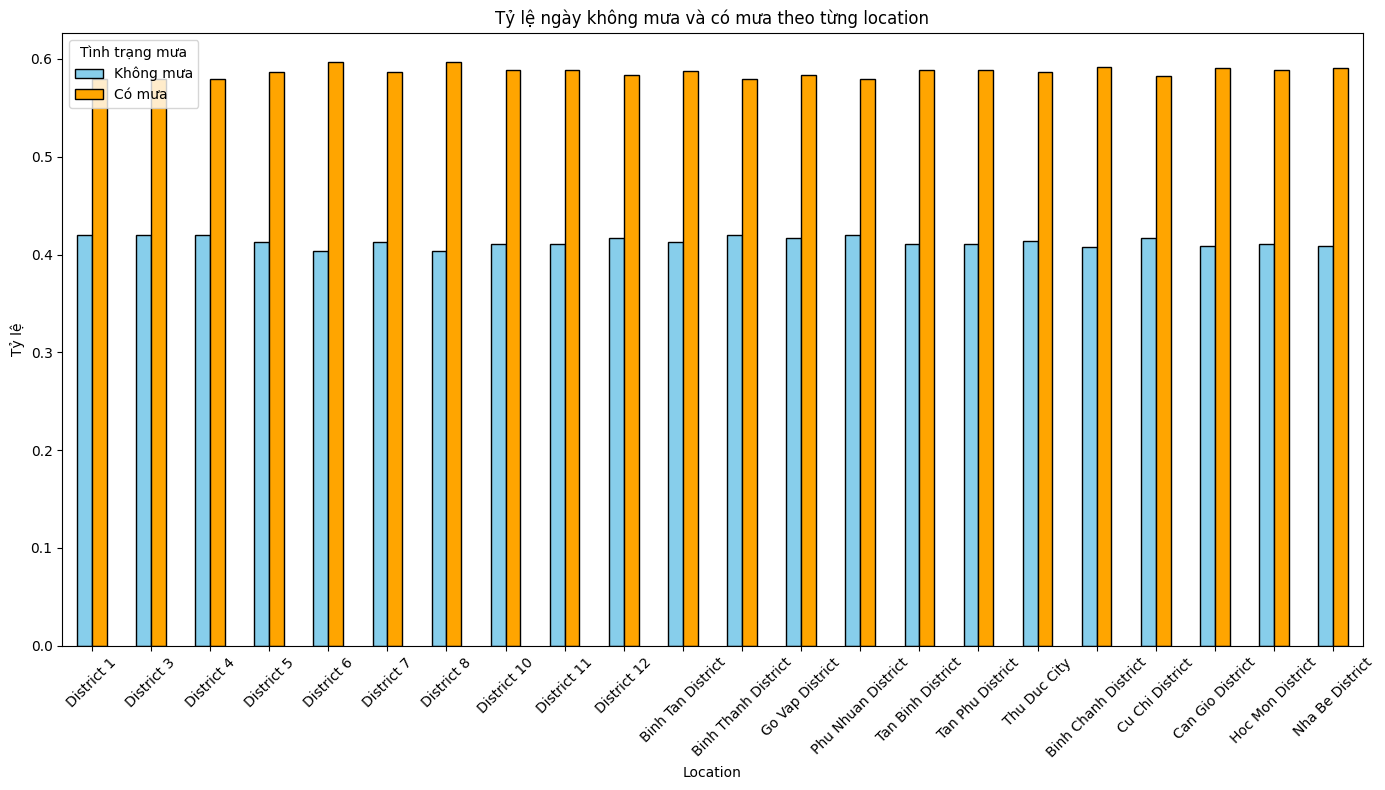

In [215]:
# Đếm số ngày mưa và không mưa theo từng location
rain_by_location = df.groupby('location')['RainToday'].value_counts(normalize=True).unstack().reindex(locations)

rain_by_location.plot(kind='bar', figsize=(14, 8), color=['skyblue', 'orange'], edgecolor='black')

plt.title('Tỷ lệ ngày không mưa và có mưa theo từng location')
plt.xlabel('Location')
plt.ylabel('Tỷ lệ')
plt.xticks(rotation=45)
plt.legend(['Không mưa', 'Có mưa'], title='Tình trạng mưa')

plt.tight_layout()

plt.show()

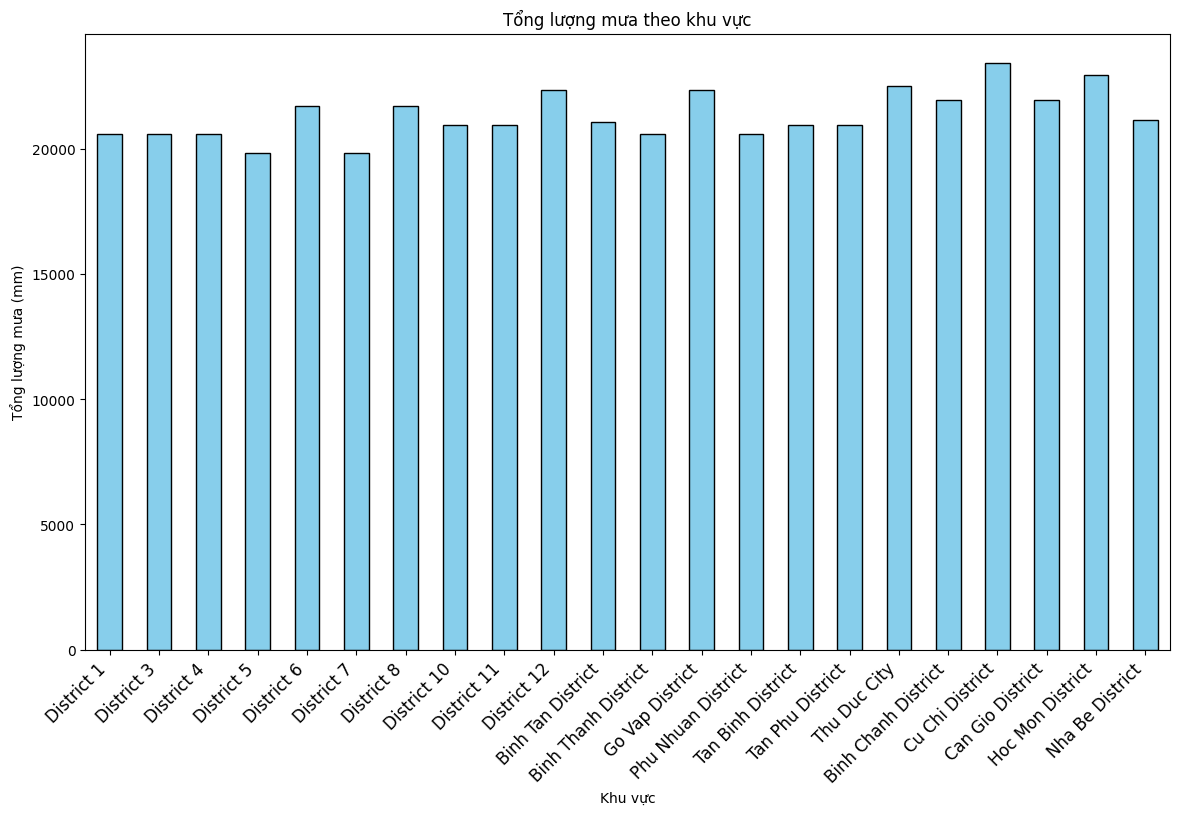

In [216]:
df.groupby('location')['precipitation_sum'].sum().reindex(locations).plot(kind='bar', figsize=(14, 8), color='skyblue', edgecolor='black')
plt.title('Tổng lượng mưa theo khu vực')
plt.xlabel('Khu vực')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Tổng lượng mưa (mm)')

plt.show()

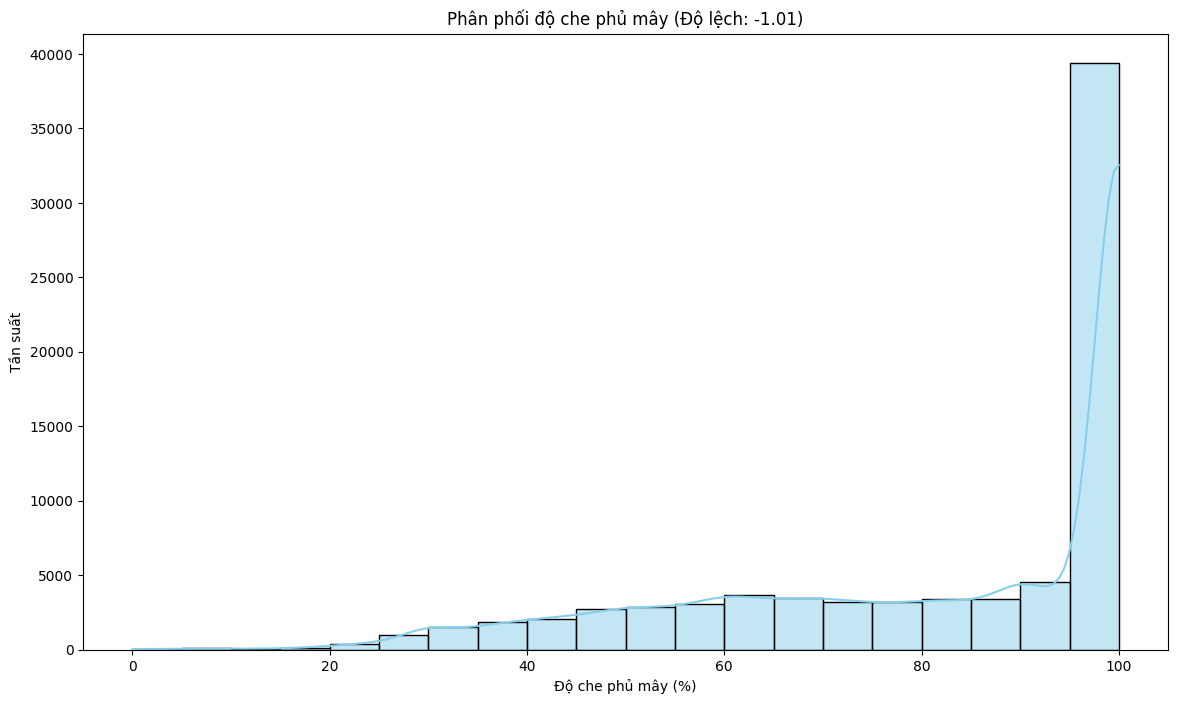

In [217]:
# Tính độ lệch
skewness = skew(df['cloud_cover'], nan_policy='omit')  # 'nan_policy' để xử lý giá trị NaN

# Vẽ biểu đồ
plt.figure(figsize=(14, 8))
sns.histplot(df['cloud_cover'], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title(f'Phân phối độ che phủ mây (Độ lệch: {skewness:.2f})')  # Hiển thị độ lệch trong tiêu đề
plt.xlabel('Độ che phủ mây (%)')
plt.ylabel('Tần suất')

plt.show()


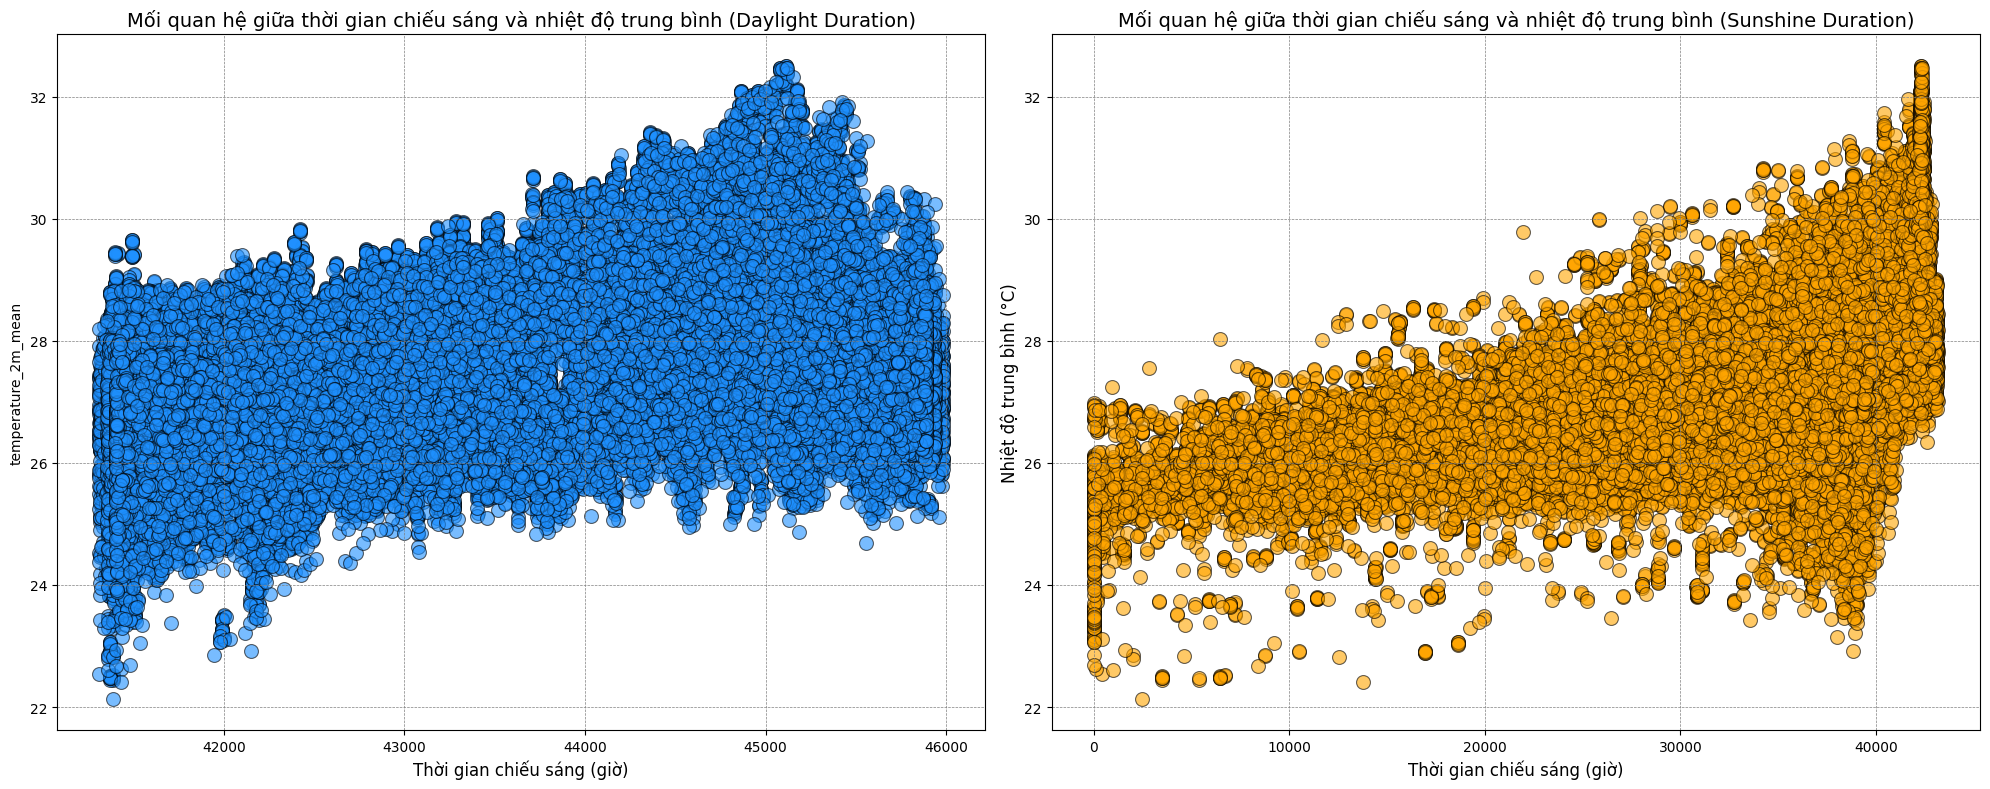

In [218]:
plt.figure(figsize=(20, 8))

# Đồ thị đầu tiên: Mối quan hệ giữa thời gian chiếu sáng và nhiệt độ trung bình (daylight_duration)
plt.subplot(1, 2, 1)
sns.scatterplot(x='daylight_duration', y='temperature_2m_mean', data=df, 
                color='dodgerblue', s=100, alpha=0.6, edgecolor='black')
plt.title('Mối quan hệ giữa thời gian chiếu sáng và nhiệt độ trung bình (Daylight Duration)', fontsize=14)
plt.xlabel('Thời gian chiếu sáng (giờ)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Đồ thị thứ hai: Mối quan hệ giữa thời gian chiếu sáng và nhiệt độ trung bình (sunshine_duration)
plt.subplot(1, 2, 2)
sns.scatterplot(x='sunshine_duration', y='temperature_2m_mean', data=df, 
                color='orange', s=100, alpha=0.6, edgecolor='black')
plt.title('Mối quan hệ giữa thời gian chiếu sáng và nhiệt độ trung bình (Sunshine Duration)', fontsize=14)
plt.xlabel('Thời gian chiếu sáng (giờ)', fontsize=12)
plt.ylabel('Nhiệt độ trung bình (°C)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

plt.tight_layout() 

plt.show()

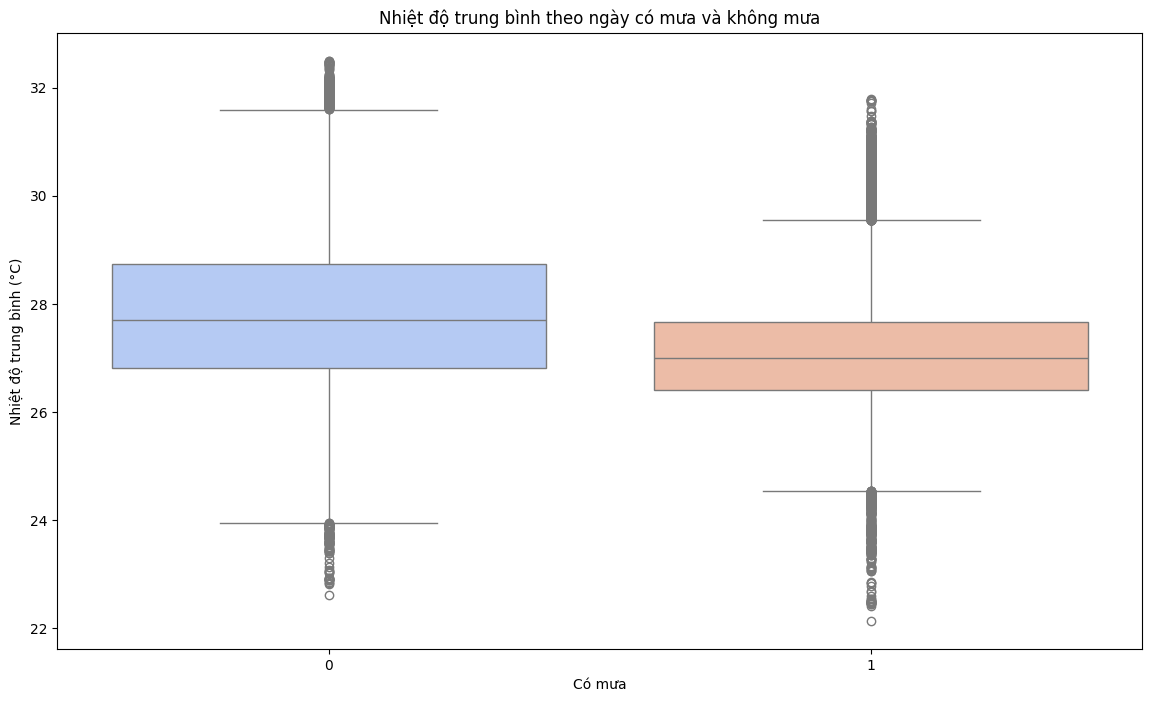

In [219]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='RainToday', y='temperature_2m_mean', data=df, palette='coolwarm', hue='RainToday', dodge=False)
plt.title('Nhiệt độ trung bình theo ngày có mưa và không mưa')
plt.xlabel('Có mưa')
plt.ylabel('Nhiệt độ trung bình (°C)')
plt.legend([], [], frameon=False)  

plt.show()

In [220]:
df.drop(columns=['RainToday'], inplace=True)

## Phân tích các thuộc tính thời tiết

Thời tiết của các quận, huyện, thành phố ở TP. Hồ Chí Minh có sự giống nhau nhất định, nhóm sẽ phân tích thời tiết theo thời gian tại một quận trung tâm của thành phố: `Quận 1`.

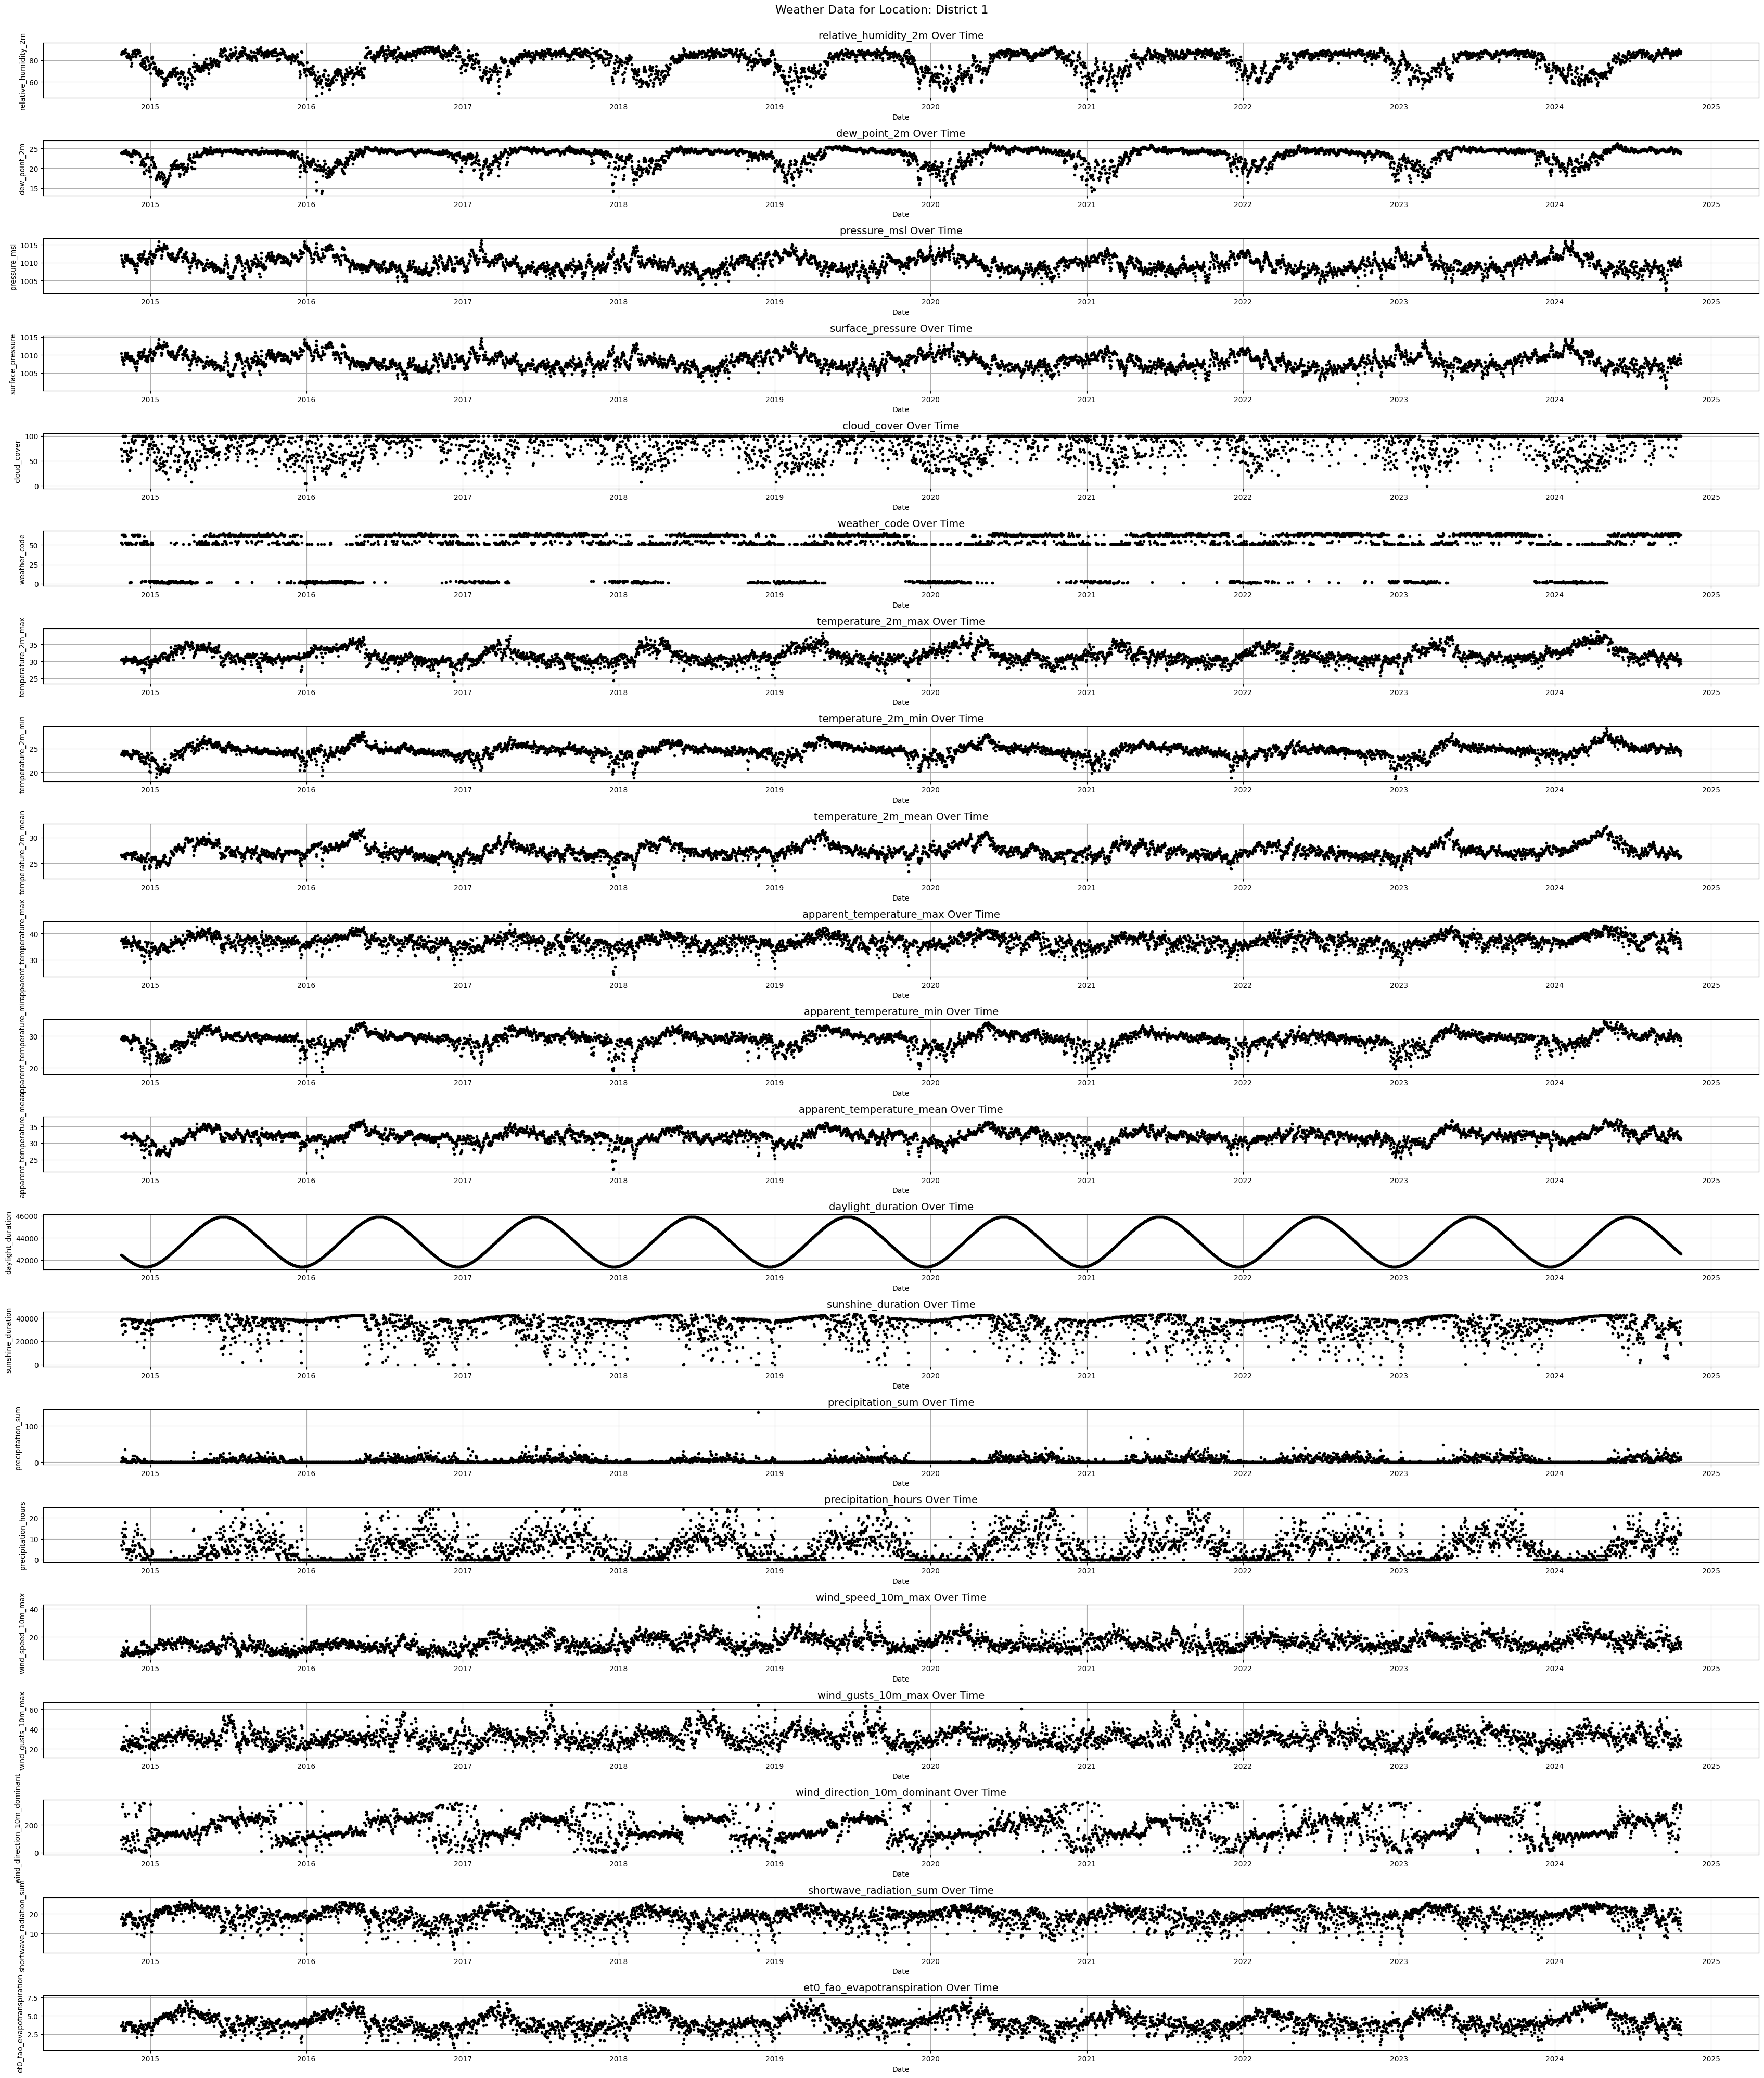

In [221]:
locations = ['District 1']
columns = df.drop(columns=['location', 'latitude', 'longitude', 'date', 'RainTomorrow']).columns

for location in locations:
    # Lọc dữ liệu cho từng location
    location_data = df[df['location'] == location]
    
    # Tạo biểu đồ chung trên 1 hình
    fig, axs = plt.subplots(len(columns), figsize=(34, 2 * len(columns)))  # Thay kích thước để phù hợp
    fig.suptitle(f"Weather Data for Location: {location}", fontsize=16)
    
    # Vẽ từng cột
    for index, column in enumerate(columns):
        axs[index].plot(location_data['date'], location_data[column], "k.")
        axs[index].set_title(f"{column} Over Time", fontsize=14)
        axs[index].set_xlabel("Date")
        axs[index].set_ylabel(column)
        axs[index].grid(True)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])  # Chỉnh layout để tiêu đề không bị che
    plt.show()


`21 thuộc tính`

`relative_humidity_2m: Độ ẩm tương đối và dew_point_2m: Nhiệt độ điểm sương`: Hai thông số có mối quan hệ chặt chẽ với nhau, thông qua biểu đồ ta thấy độ ẩm tương đối và nhiệt độ điểm sương có sự biến thiên theo mùa, độ ẩm tương đối và nhiệt độ điểm sương **<u>tăng</u>** vào mùa mưa (tháng 5 - tháng 11) và **<u>giảm</u>** vào mùa khô (tháng 12 - tháng 4).

`pressure_msl: Áp suất không khí tại mặt biển và surface_perssure: áp suất không khí tại mặt đất:` hai thông số này có mối quan hệ chặt chẽ với nhau, thông qua biểu đồ ta hai thông số của áp suất có sự biến thiên theo mùa, chúng **<u>tăng</u>** vào mùa khô (tháng 12 - tháng 4) và **<u>giảm</u>** vào mùa mưa (tháng 5 - tháng 11) - đối nghịch với 2 thông số phía trên.

`cloud_cover: Mây che phủ:` Thông số này cũng biến thiên theo mùa và tỉ lệ thuận với độ ẩm tương đối và nhiệt độ điểm sương.

`weather_code: Mã thời tiết`: theo quy định của WMO, mã thời tiết được chia thành 10 loại, trong đó 3 loại chính là `Clear` -> `Cloudy` -> `Rain`. Thông qua biểu đồ ta thấy mã thời tiết `Clear` chiếm tỉ lệ lớn nhất, `Cloudy` chiếm tỉ lệ nhỏ nhất và `Rain` chiếm tỉ lệ trung bình. Cũng phù hợp với mùa của TP. Hồ Chí Minh

Có 6 thuộc tính biểu thị nhiệt độ của không khí gồm: `temperature_2m_max`, `temperature_2m_min`, `temperature_2m`, `apparent_temperature_max`, `apparent_temperature_min`, `apparent_temperature_mean`. Các thông số này có sự biến thiên theo mùa, nhiệt độ tăng vào mùa khô và giảm vào mùa mưa. Nhiệt độ cũng không có sự thay đổi nào lớn trong 10 năm vừa qua

`daylight_duration: Thời lượng ánh sáng ban ngày:` biến thiên theo chu kỳ, đỉnh và đáy xuất hiện đều đặn hàng năm theo chu kì của Trái Đất </br>
`sunshine_duration: Thời lượng ánh nắng mặt trời:`: có xu hướng biến động theo chu kỳ, nhưng không hoàn toàn đều đặn như `daylight_duration`. Trong các tháng mùa khô (tháng 12 - tháng 4) thường cao hơn do thời tiết ít mây và khô ráo còn các tháng mùa mưa (tháng 5 - tháng 11) thì giảm đáng kể, xuất hiện nhiều ngày không có nắng hoặc thời gian nắng rất thấp. Trong mùa mưa sẽ không ổn định vì mưa nắng xen kẽ hoặc nhiều ngày âm u. </br>
`shortwave_radiation_sum: Tổng bức xạ ngắn sóng:` biến thiên theo chu kỳ, tăng vào mùa khô và giảm vào mùa mưa.

`precipitation_sum (tổng lượng mưa)` và `precipitation_hours (thời gian mưa)`: thông qua biểu đồ ta thấy lượng mưa cũng biến thiên. Có điểm đáng chú ý ở khoảng cuối tháng 11 có ngày lượng mưa đã cao vượt trội so với các thời gian khác.

Thông số về gió gồm `wind_speed_10m_max (tốc độ gió tối đa ở độ cao 10m)`, `wind_gusts_10m_max (cơn gió mạnh nhất ở độ cao 10m)`, `wind_direction_10m_dominant (hướng gió chủ yếu ở độ cao 10m)`: có nhiều giá trị nhiễu loạn, có thể do ảnh hưởng từ các cơn bão lớn
- Gió mùa Tây Nam (tháng 5 - 10): Hướng gió thường từ phía Tây Nam, mang theo mưa từ biển vào đất liền.
- Gió mùa Đông Bắc (tháng 11 - 4): Hướng gió thường chuyển sang Đông Bắc, khô hơn và ít mưa hơn.

`et0_fao_evapotranspiration (lượng hơi nước bay hơi)`: biến thiên theo chu kỳ, tăng vào mùa khô và giảm vào mùa mưa, tỉ lệ thuận với nhiệt độ.

## Mối quan hệ giữa các biến độc lập

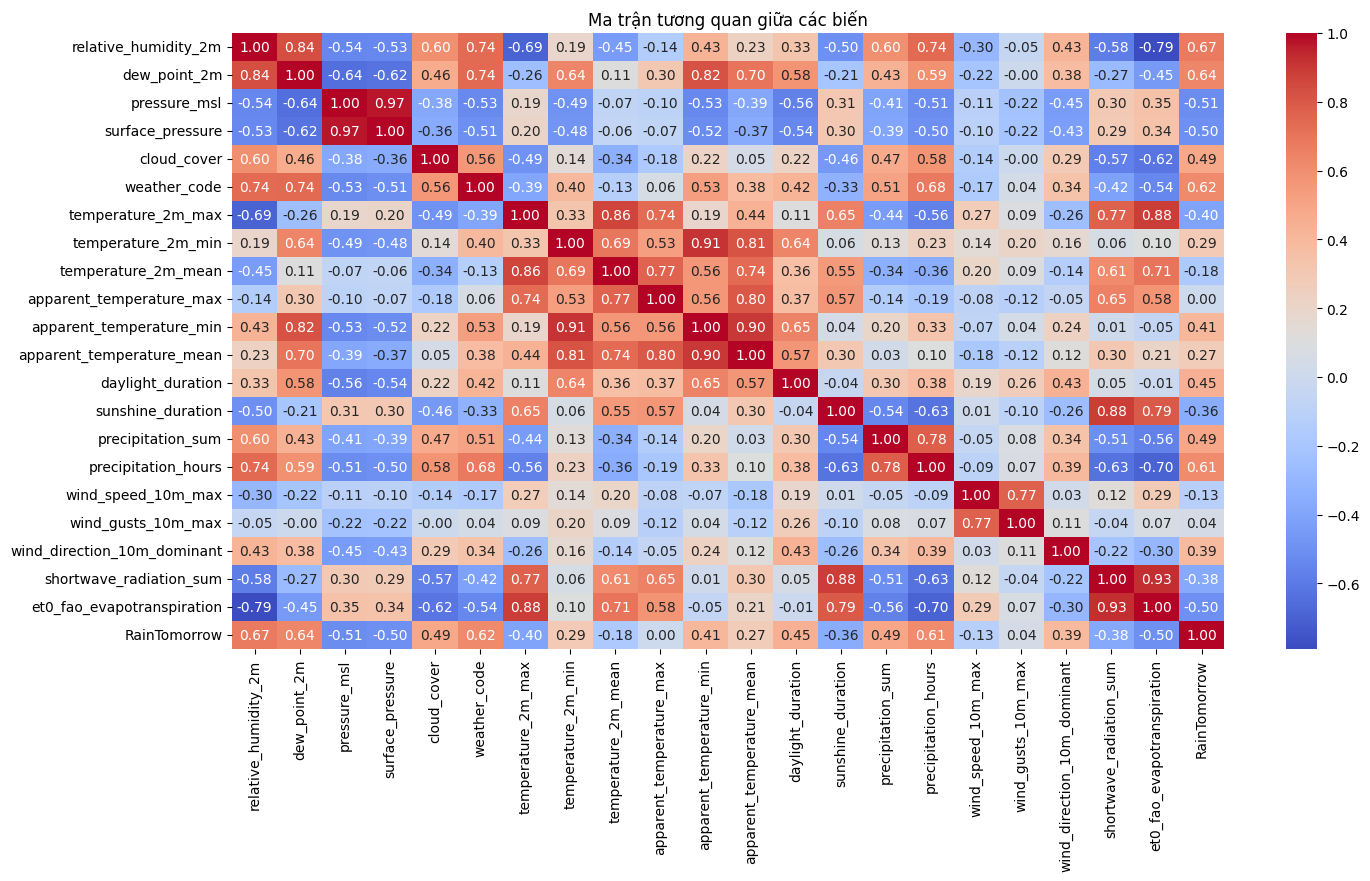

In [222]:
plt.figure(figsize=(16, 8))

# Tính toán ma trận tương quan
correlation_matrix = df.drop(columns=['location', 'latitude', 'longitude', 'date']).corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt='.2f')
plt.title('Ma trận tương quan giữa các biến')
plt.show()

Theo ma trận tương quan, ta cần xoá một số biến như sau:
- `date`, `latitude`, `longitude`: không cần thiết
- `temperature_2m_mean`, `apparent_temperature_mean`, `apparent_temperature_min`, `apparent_temperature_max`: các thuộc tính về nhiệt độ có mối quan hệ chặt chẽ với nhau, ta chỉ cần giữ lại một trong số chúng để tránh hiện tượng đa cộng tuyến (multicollinearity) trong mô hình dự đoán.
- `shortwave_radiation_sum`: vì có mối quan hệ mạnh với `et0_fao_evapotranspiration` nên ta chỉ cần giữ lại một trong số chúng.
- `pressure_msl`: vì có mối quan hệ mạnh với `surface_pressure` nên ta chỉ cần giữ lại một trong số chúng.
- `wind_gusts_10m_max`: vì có mối quan hệ mạnh với `wind_speed_10m_max` nên ta chỉ cần giữ lại một trong số chúng.
- `dew_point_2m`: vì có mối quan hệ mạnh với `relative_humidity_2m` nên ta chỉ cần giữ lại một trong số chúng.

In [223]:
df.drop(columns=['latitude', 'longitude', 'date', 'temperature_2m_mean', 'apparent_temperature_mean', 'apparent_temperature_min', 'apparent_temperature_max', 'shortwave_radiation_sum', 'pressure_msl', 'wind_gusts_10m_max', 'dew_point_2m'], inplace=True)

In [224]:
df.to_csv('./Dataset - Giai đoạn 2/HCMCity_weather.csv', index=False)

# Giai đoạn 3 - Xây dựng mô hình

In [225]:
print(df.columns)
print(len(df.columns))

Index(['location', 'relative_humidity_2m', 'surface_pressure', 'cloud_cover',
       'weather_code', 'temperature_2m_max', 'temperature_2m_min',
       'daylight_duration', 'sunshine_duration', 'precipitation_sum',
       'precipitation_hours', 'wind_speed_10m_max',
       'wind_direction_10m_dominant', 'et0_fao_evapotranspiration',
       'RainTomorrow'],
      dtype='object')
15


In [226]:
df.to_csv('./Dataset - Hoàn chỉnh/HCMCity_weather.csv', index=False)

## Tìm mô hình với thuật toán tốt nhất

Xây dựng mô hình dự báo khả năng mưa vào ngày hôm sau dựa trên dữ liệu thời tiết của ngày hôm trước. </br>
Kiểm tra độ chính xác của 3 thuật toán phổ biến khi cho bài toán phân loại nhị phân: `Random Forest`, `XGBoost`, `LGBM` </br>
Kiểm tra trên các độ đo `Accuracy`, `Precision`, `Recall`, `F1 Score`, `ROC AUC`

In [227]:
# Hàm đánh giá mô hình phân loại
def evaluate_model(y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    roc_auc = roc_auc_score(y_true, y_prob[:, 1])  # Chọn xác suất lớp 1
    return accuracy, precision, recall, f1, roc_auc

# Hàm mô hình RandomForest
def RandomForestClassifierModel(x_train, x_test, y_train, y_test):
    model = RandomForestClassifier(
        n_estimators=50,
        max_depth=7,            # Giới hạn độ sâu cây
        min_samples_split=10,     # Số mẫu tối thiểu để chia
        min_samples_leaf=1,      # Số mẫu tối thiểu cho mỗi lá
        max_features= 'sqrt',
        random_state=42
    )
    model.fit(x_train, y_train)

    # Dự đoán trên tập train
    y_train_pred = model.predict(x_train)
    y_train_prob = model.predict_proba(x_train)
    train_metrics = evaluate_model(y_train, y_train_pred, y_train_prob)

    # Dự đoán trên tập test
    y_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)
    test_metrics = evaluate_model(y_test, y_test_pred, y_test_prob)

    return train_metrics, test_metrics

# Hàm mô hình XGBClassifier
def XGBClassifierModel(x_train, x_test, y_train, y_test):
    model = XGBClassifier(
        n_estimators=100,        # Số lượng cây
        learning_rate=0.01,      # Tốc độ học nhỏ hơn
        max_depth=3,             # Độ sâu tối đa của cây
        subsample=0.8,           # Tỷ lệ mẫu được chọn ngẫu nhiên từ tập huấn luyện
        colsample_bytree=0.8,    # Tỷ lệ đặc trưng được chọn ngẫu nhiên cho mỗi cây
        reg_alpha=0.1,           # Regularization L1
        reg_lambda=1,            # Regularization L2
        random_state=42
    )

    model.fit(x_train, y_train)

    # Dự đoán trên tập train
    y_train_pred = model.predict(x_train)
    y_train_prob = model.predict_proba(x_train)
    train_metrics = evaluate_model(y_train, y_train_pred, y_train_prob)

    # Dự đoán trên tập test
    y_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)
    test_metrics = evaluate_model(y_test, y_test_pred, y_test_prob)

    return train_metrics, test_metrics

# Hàm mô hình LGBMClassifier
def LGBMClassifierModel(x_train, x_test, y_train, y_test):
    model = LGBMClassifier(
        n_estimators=100,         # Số lượng cây
        learning_rate=0.01,       # Tốc độ học nhỏ hơn để tránh overfitting
        max_depth=3,              # Độ sâu tối đa của cây
        subsample=0.8,            # Tỷ lệ mẫu được chọn ngẫu nhiên từ tập huấn luyện
        colsample_bytree=0.8,     # Tỷ lệ đặc trưng được chọn ngẫu nhiên cho mỗi cây
        reg_alpha=0.1,            # Regularization L1
        reg_lambda=1,             # Regularization L2
        random_state=42
    )

    model.fit(x_train, y_train)

    # Dự đoán trên tập train
    y_train_pred = model.predict(x_train)
    y_train_prob = model.predict_proba(x_train)
    train_metrics = evaluate_model(y_train, y_train_pred, y_train_prob)

    # Dự đoán trên tập test
    y_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)
    test_metrics = evaluate_model(y_test, y_test_pred, y_test_prob)

    return train_metrics, test_metrics


In [228]:
# Khởi tạo danh sách lưu kết quả
results = []

locations = df['location'].unique()

for location in locations:
    df_location = df[df['location'] == location]

    x = df_location.drop(columns=['RainTomorrow', 'location'])
    y = df_location['RainTomorrow']

    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    # Tách dữ liệu train-test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    # RandomForestClassifier
    train_metrics, test_metrics = RandomForestClassifierModel(x_train, x_test, y_train, y_test)
    results.append({
        'Location': location, 'Model': 'RandomForest',
        'Train Accuracy': train_metrics[0], 'Test Accuracy': test_metrics[0],
        'Train Precision': train_metrics[1], 'Test Precision': test_metrics[1],
        'Train Recall': train_metrics[2], 'Test Recall': test_metrics[2],
        'Train F1-score': train_metrics[3], 'Test F1-score': test_metrics[3],
        'Train ROC AUC': train_metrics[4], 'Test ROC AUC': test_metrics[4]
    })

    # XGBClassifier
    train_metrics, test_metrics = XGBClassifierModel(x_train, x_test, y_train, y_test)
    results.append({
        'Location': location, 'Model': 'XGB',
        'Train Accuracy': train_metrics[0], 'Test Accuracy': test_metrics[0],
        'Train Precision': train_metrics[1], 'Test Precision': test_metrics[1],
        'Train Recall': train_metrics[2], 'Test Recall': test_metrics[2],
        'Train F1-score': train_metrics[3], 'Test F1-score': test_metrics[3],
        'Train ROC AUC': train_metrics[4], 'Test ROC AUC': test_metrics[4]
    })

    # LGBMClassifier
    train_metrics, test_metrics = LGBMClassifierModel(x_train, x_test, y_train, y_test)
    results.append({
        'Location': location, 'Model': 'LGBM',
        'Train Accuracy': train_metrics[0], 'Test Accuracy': test_metrics[0],
        'Train Precision': train_metrics[1], 'Test Precision': test_metrics[1],
        'Train Recall': train_metrics[2], 'Test Recall': test_metrics[2],
        'Train F1-score': train_metrics[3], 'Test F1-score': test_metrics[3],
        'Train ROC AUC': train_metrics[4], 'Test ROC AUC': test_metrics[4]
    })

# xoá output cell
from IPython.display import clear_output

clear_output()

In [229]:
results_df = pd.DataFrame(results).round(decimals=5)
results_df

Location         Model  Train Accuracy  Test Accuracy  \
0         District 1  RandomForest         0.90411        0.86588   
1         District 1           XGB         0.86928        0.85949   
2         District 1          LGBM         0.86654        0.86040   
3         District 3  RandomForest         0.90411        0.86588   
4         District 3           XGB         0.86928        0.85949   
..               ...           ...             ...            ...   
61  Hoc Mon District           XGB         0.86928        0.86770   
62  Hoc Mon District          LGBM         0.86654        0.87135   
63   Nha Be District  RandomForest         0.91194        0.85949   
64   Nha Be District           XGB         0.87162        0.86223   
65   Nha Be District          LGBM         0.86967        0.86588   

    Train Precision  Test Precision  Train Recall  Test Recall  \
0           0.90728         0.88474       0.92881      0.88612   
1           0.87215         0.87752       0.90644      0.88300   
2           0.86534         0.87309       0.91051      0.89080   
3           0.90728         0.88474       0.92881      0.88612   
4           0.87215         0.87752       0.90644      0.88300   
..              ...             ...           ...          ...   
61          0.86900         0.86310       0.91826      0.91627   
62          0.86704         0.86391       0.91562      0.92259   
63          0.91901         0.88253       0.93302      0.87982   
64          0.87772         0.87842       0.90915      0.89060   
65          0.87540         0.88262       0.90849      0.89214   

    Train F1-score  Test F1-score  Train ROC AUC  Test ROC AUC  
0          0.91792        0.88542        0.96808       0.93346  
1          0.88896        0.88025        0.93835       0.93051  
2          0.88735        0.88185        0.93837       0.92755  
3          0.91792        0.88542        0.96808       0.93346  
4          0.88896        0.88025        0.93835       0.93051  
..             ...            ...            ...           ...  
61         0.89295        0.88889        0.93336       0.92976  
62         0.89067        0.89228        0.93331       0.92889  
63         0.92596        0.88117        0.97044       0.92723  
64         0.89316        0.88447        0.93879       0.92907  
65         0.89164        0.88736        0.93839       0.92623  

[66 rows x 12 columns]

In [230]:
# Group data by 'Model' and calculate the mean and standard deviation for test metrics
metrics = ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-score', 'Test ROC AUC']
summary_stats = results_df.groupby('Model')[metrics].agg(['mean', 'std'])

# Sort the results by 'Test Accuracy mean' for better comparison
summary_stats_sorted = summary_stats.sort_values(('Test Accuracy', 'mean'), ascending=False)
# Format the numerical values to 5 decimal places for better readability
summary_stats_sorted = summary_stats_sorted.round(5)
summary_stats_sorted



Test Accuracy          Test Precision          Test Recall  \
                      mean      std           mean      std        mean   
Model                                                                     
RandomForest       0.86675  0.00515        0.88549  0.00413     0.88822   
XGB                0.86592  0.00751        0.87822  0.00722     0.89626   
LGBM               0.86513  0.00753        0.87673  0.00710     0.89670   

                      Test F1-score          Test ROC AUC           
                  std          mean      std         mean      std  
Model                                                               
RandomForest  0.01067       0.88680  0.00430      0.93076  0.00446  
XGB           0.01402       0.88706  0.00659      0.93051  0.00372  
LGBM          0.01223       0.88654  0.00633      0.92835  0.00353

Nhận xét:
- Độ chính xác tốt nhất (Test Accuracy): `RandomForest` có Test Accuracy cao nhất (86.67%) và độ lệch chuẩn thấp nhất (0.58%), thể hiện sự ổn định.
- Độ chính xác (Precision): `RandomForest` nhỉnh hơn một chút so với XGB và LGBM.
- Khả năng thu hồi (Recall): `LGBM` đạt giá trị Recall cao nhất (89.67%), nhưng độ chính xác và F1-score thấp hơn một chút.
- Điểm F1 (F1-score): `XGB` đạt F1-score cao nhất (88.71%), cho thấy sự cân bằng giữa Precision và Recall.
- ROC AUC: `RandomForest` có ROC AUC trung bình cao nhất (93.08%), phản ánh khả năng phân loại tốt nhất.

## Kiểm chứng chéo

In [231]:
def cross_validate_model(model, x, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'ROC AUC': []}

    for train_index, val_index in skf.split(x, y):
        # Sử dụng chỉ mục vị trí khi x là NumPy array
        x_train, x_val = x[train_index], x[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Huấn luyện mô hình
        model.fit(x_train, y_train)
        y_val_pred = model.predict(x_val)
        y_val_prob = model.predict_proba(x_val)

        # Tính toán các metric
        metrics['Accuracy'].append(accuracy_score(y_val, y_val_pred))
        metrics['Precision'].append(precision_score(y_val, y_val_pred, zero_division=0))
        metrics['Recall'].append(recall_score(y_val, y_val_pred, zero_division=0))
        metrics['F1-score'].append(f1_score(y_val, y_val_pred, zero_division=0))
        metrics['ROC AUC'].append(roc_auc_score(y_val, y_val_prob[:, 1]))

    # Trả về giá trị trung bình của các metric
    return {metric: np.mean(scores) for metric, scores in metrics.items()}


# Cập nhật kết quả kiểm chứng chéo vào quy trình
cross_val_results = []

for location in locations:
    df_location = df[df['location'] == location]

    x = df_location.drop(columns=['RainTomorrow', 'location'])
    y = df_location['RainTomorrow']

    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    x = scaler.fit_transform(x)  # x giờ là NumPy array
    y = y.values  # Đảm bảo y cũng là NumPy array

    # RandomForestClassifier
    rf_model = RandomForestClassifier(
        n_estimators=50, max_depth=7, min_samples_split=10,
        min_samples_leaf=1, max_features='sqrt', random_state=42
    )
    rf_cv_metrics = cross_validate_model(rf_model, x, y)
    cross_val_results.append({
        'Location': location, 'Model': 'RandomForest',
        **rf_cv_metrics
    })

    # XGBClassifier
    xgb_model = XGBClassifier(
        n_estimators=100, learning_rate=0.01, max_depth=3,
        subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1,
        reg_lambda=1, random_state=42
    )
    xgb_cv_metrics = cross_validate_model(xgb_model, x, y)
    cross_val_results.append({
        'Location': location, 'Model': 'XGB',
        **xgb_cv_metrics
    })

    # LGBMClassifier
    lgbm_model = LGBMClassifier(
        n_estimators=100, learning_rate=0.01, max_depth=3,
        subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1,
        reg_lambda=1, random_state=42
    )
    lgbm_cv_metrics = cross_validate_model(lgbm_model, x, y)
    cross_val_results.append({
        'Location': location, 'Model': 'LGBM',
        **lgbm_cv_metrics
    })


# Chuyển đổi kết quả thành DataFrame và hiển thị
cross_val_results_df = pd.DataFrame(cross_val_results).round(decimals=5)

clear_output()
cross_val_results_df

Location         Model  Accuracy  Precision   Recall  F1-score  \
0         District 1  RandomForest   0.86086    0.87214  0.89084   0.88130   
1         District 1           XGB   0.86169    0.86991  0.89557   0.88249   
2         District 1          LGBM   0.85868    0.86727  0.89320   0.87996   
3         District 3  RandomForest   0.86086    0.87214  0.89084   0.88130   
4         District 3           XGB   0.86169    0.86991  0.89557   0.88249   
..               ...           ...       ...        ...      ...       ...   
61  Hoc Mon District           XGB   0.85566    0.85755  0.90558   0.88085   
62  Hoc Mon District          LGBM   0.85812    0.85948  0.90791   0.88291   
63   Nha Be District  RandomForest   0.86141    0.88104  0.88504   0.88291   
64   Nha Be District           XGB   0.86360    0.87527  0.89709   0.88597   
65   Nha Be District          LGBM   0.85922    0.87135  0.89385   0.88234   

    ROC AUC  
0   0.92882  
1   0.92790  
2   0.92660  
3   0.92882  
4   0.92790  
..      ...  
61  0.92357  
62  0.92193  
63  0.92637  
64  0.92609  
65  0.92527  

[66 rows x 7 columns]

In [232]:
# Group data by 'Model' and calculate the mean and standard deviation for test metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']
summary_stats = cross_val_results_df.groupby('Model')[metrics].agg(['mean', 'std'])

# Sort the results by 'Test Accuracy mean' for better comparison
summary_stats_sorted = summary_stats.sort_values(('Accuracy', 'mean'), ascending=False)
# Format the numerical values to 5 decimal places for better readability
summary_stats_sorted = summary_stats_sorted.round(5)
summary_stats_sorted

Accuracy          Precision            Recall          F1-score  \
                 mean      std      mean      std     mean      std     mean   
Model                                                                          
RandomForest  0.86112  0.00380   0.87458  0.00396  0.89124  0.00552  0.88272   
XGB           0.86017  0.00288   0.86756  0.00486  0.89909  0.00450  0.88293   
LGBM          0.85837  0.00246   0.86696  0.00480  0.89631  0.00489  0.88127   

                       ROC AUC           
                  std     mean      std  
Model                                    
RandomForest  0.00323  0.92640  0.00232  
XGB           0.00241  0.92557  0.00195  
LGBM          0.00229  0.92434  0.00197

Kết luận: `RandomForest là thuật toán hiệu quả và ổn định nhất`

## Thực hiện xây dựng lại mô hình tới toàn bộ dữ liệu

In [233]:
# tạo 22 model cho 22 location
models = []

locations = df['location'].unique()
for location in locations:
    df_location = df[df['location'] == location]

    x = df_location.drop(columns=['RainTomorrow', 'location'])
    y = df_location['RainTomorrow']

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    model = RandomForestClassifier(
        n_estimators=50,
        max_depth=7,            # Giới hạn độ sâu cây
        min_samples_split=10,     # Số mẫu tối thiểu để chia
        min_samples_leaf=1,      # Số mẫu tối thiểu cho mỗi lá
        max_features= 'sqrt',
        random_state=42
    )
    model.fit(x_train, y_train)

    models.append({'Location': location, 'Model': model})

In [234]:
print(df.columns,'\n',len(df.columns))

Index(['location', 'relative_humidity_2m', 'surface_pressure', 'cloud_cover',
       'weather_code', 'temperature_2m_max', 'temperature_2m_min',
       'daylight_duration', 'sunshine_duration', 'precipitation_sum',
       'precipitation_hours', 'wind_speed_10m_max',
       'wind_direction_10m_dominant', 'et0_fao_evapotranspiration',
       'RainTomorrow'],
      dtype='object') 
 15


In [235]:
# Dữ liệu thời tiết trong ngày -> dự đoán mưa vào ngày hôm sau
data = pd.DataFrame({
    'location': ['District 1'],
    'relative_humidity_2m': [0.0],              # Độ ẩm tương đối 2m (0-100%)
    'surface_pressure': [1000.0],               # Áp suất bề mặt (hPa)
    'cloud_cover': [0.0],                       # Độ che phủ mây (0-100%)
    'weather_code': [56],                       # Mã thời tiết (0-99)
    'temperature_2m_max': [32.0],               # Nhiệt độ tối đa 2m (°C)
    'temperature_2m_min': [24.0],               # Nhiệt độ tối thiểu 2m (°C)
    'daylight_duration': [12.0],                # Thời gian chiếu sáng (giây)
    'sunshine_duration': [12.0],                # Thời gian chiếu nắng (giây)
    'precipitation_sum': [100],                 # Tổng lượng mưa (mm)
    'precipitation_hours': [5],                 # Số giờ mưa (giờ)
    'wind_speed_10m_max': [3.0],                # Tốc độ gió tối đa 10m (m/s)
    'wind_direction_10m_dominant': [180.0],     # Hướng gió chủ đạo 10m (°)
    'et0_fao_evapotranspiration': [0.0],        # Chỉ số thoát hơi nước FAO (mm)
})
location = data['location'][0]

model = [m['Model'] for m in models if m['Location'] == location][0]

x = data.drop(columns=['location'])
x = scaler.transform(x)

y_pred = model.predict(x)

print(f"In location: {location}")
print(f"Rain Tomorrow: {y_pred[0].astype(bool)}")

In location: District 1
Rain Tomorrow: True
